In [1]:
import scipy.io
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import numpy as np
import h5py
import seaborn as sns
import math

In [2]:
# plt.savefig("/home/thaobeo/git/HeartResearch/data_graph.pdf", format = 'pdf', dpi = 300)

In [3]:
all_data_dir =  "/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH"
print(os.listdir(all_data_dir))

['metadata.csv', 'data_df.csv', 'data_df_no1.csv', 'records']


In [4]:
label_df = pd.read_csv("/media/mountHDD3/data_storage/biomedical_data/ecg_data/SPH/data_df_no1.csv")

In [5]:
data = label_df['Label'].value_counts()

In [6]:
print(data)

1      13903
22      1312
147     1115
23       878
105      838
146      505
145      468
106      390
21       385
60       175
50       169
125      165
120      102
30        86
121       83
101       56
104       46
36        29
155       27
142       23
108       21
82        16
80         9
54         8
51         6
83         5
102        4
88         4
140        3
31         2
152        2
Name: Label, dtype: int64


In [7]:
label = ['Normal', 'Sinus Bradycardia', 'T-wave Abnormality', 'Sinus Arrhythmia', 'Incomplete Right Bundle-branch Block', 
         'ST Deviation with T-wave change', 'ST Deviation', 'Right Bundle-branch Block', 'Sinus Tachycardia', 'Ventricular Premature Complex',
         'Atrial Fibrillation', 'Low Voltage', 'Right-axis Deviation', 'Atrial Premature Complex', 'Left-axis Deviation', 
         'Left Anterior Fascicular Block', 'Left Bundle-branch Block', 'Junctional Premature Complex', 'Early Repolarization', 
         'Left Ventricular Hypertrophy', 'Ventricular Preexcitation', 'Prolonged PR Interval', 'Short PR Interval', 'Junctional Tachycardia',
         'Atrial Flutter', 'Second-degree AV block - Mobitz type I', 'Left Posterior Fascicular Block', 'Third-degree Atrioventricular Block', 
         'Left Atrial Enlargement', 'Non-conducted Premature Atrial Complex', 'TU Fusion', 
         '1 Sinus Bradycardia', '1 Normal', '1 Atrial Fibrillation', '1 Sinus Tachycardia', 'Supraventricular Tachycardia', '1 Atrial Flutter', 
         'Sinus Irregularity', 'Atrial Tachycardia', 'Atrioventricular Node Reentrant Tachycardia', 'Atrioventricular Reentrant Tachycardia', 
         'Sinus Atrium to Atrial Wandering Rhythm', 
         '2 Right Bundle Branch Block', '2 Atrial Fibrillation', '2 Normal', 'ST-segment Depression', 'First-degree Atrioventricular Block', 
         'Premature Ventricular Contraction', 'Premature Atrial Contraction', '2 Left Bundle-branch Block', 'ST-segment Elevated']

chapman = pd.DataFrame({'Label': [3888, 1825, 1780, 1564, 544, 438, 397, 121, 16, 8, 7]})
cpsc = pd.DataFrame({'Label': [1695, 1098, 918, 825, 704, 672, 556, 207, 202]})
print(len(label))

51


In [8]:
df = pd.DataFrame(data)
df = pd.concat([df, chapman], ignore_index = True)
df = pd.concat([df, cpsc], ignore_index = True)
print(df)

    Label
0   13903
1    1312
2    1115
3     878
4     838
5     505
6     468
7     390
8     385
9     175
10    169
11    165
12    102
13     86
14     83
15     56
16     46
17     29
18     27
19     23
20     21
21     16
22      9
23      8
24      6
25      5
26      4
27      4
28      3
29      2
30      2
31   3888
32   1825
33   1780
34   1564
35    544
36    438
37    397
38    121
39     16
40      8
41      7
42   1695
43   1098
44    918
45    825
46    704
47    672
48    556
49    207
50    202


In [9]:
df['Name'] = label

In [128]:
t = []
for i in range (len(df['Label'])):
    t.append(int(100*math.log(math.e, int(df.loc[i, 'Label']))))
    # t.append(sigmoid((int(df.loc[i, 'Label']))))
print(t)
# t = math.log(df.loc[0, 'Label'])
# print(t)

[10, 13, 14, 14, 14, 16, 16, 16, 16, 19, 19, 19, 21, 22, 22, 24, 26, 29, 30, 31, 32, 36, 45, 48, 55, 62, 72, 72, 91, 144, 144, 12, 13, 13, 13, 15, 16, 16, 20, 36, 48, 51, 13, 14, 14, 14, 15, 15, 15, 18, 18]


In [129]:
df['Scale'] = t

<AxesSubplot: xlabel='Label', ylabel='Name'>

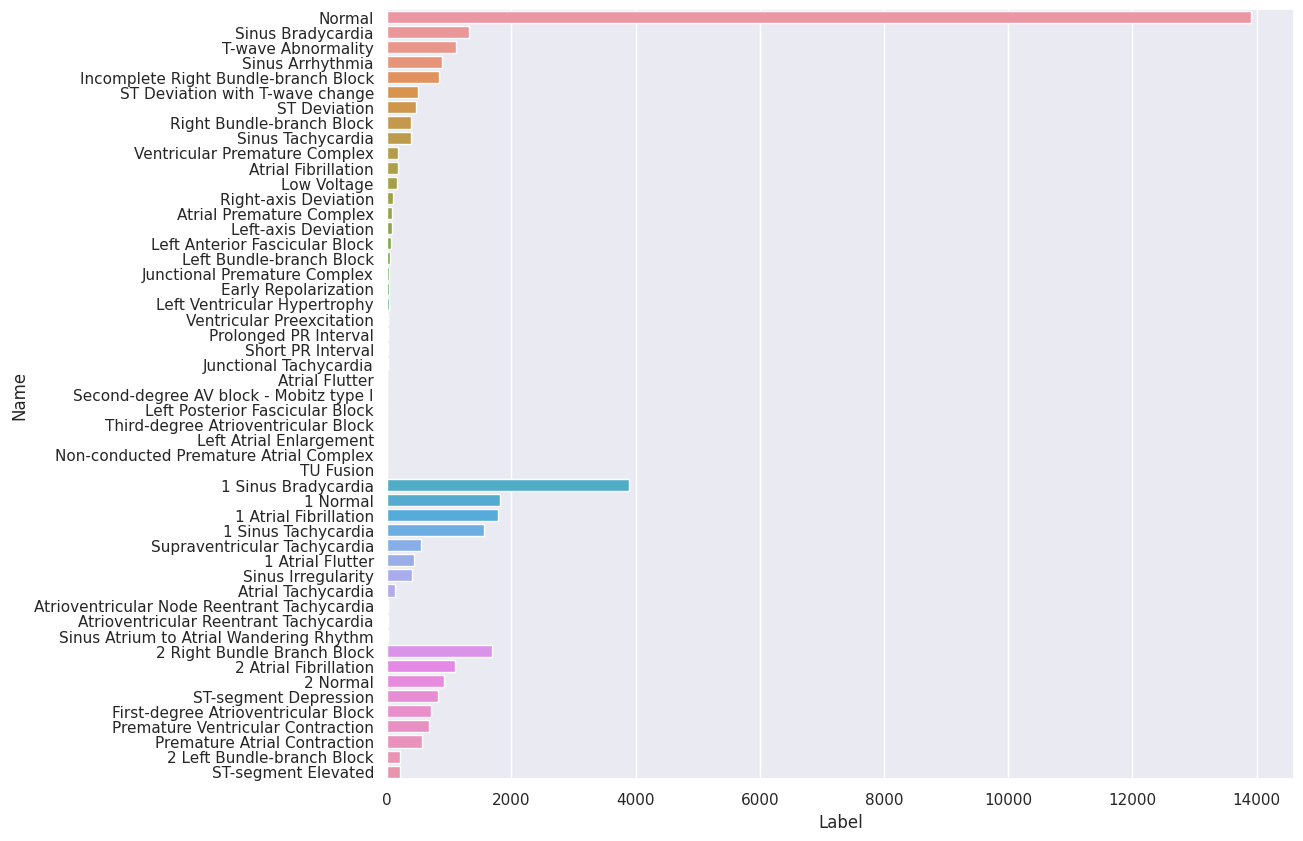

In [137]:
sns.set_theme(rc={'figure.figsize':(11.7,10)})
sns.barplot(df, x = 'Label', y = 'Name',  errorbar=None, orient = 'h')

#create seaborn countplot
# my_plot = sns.countplot(data=df, x='Scale')

#rotate x-axis labels
# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [131]:
# df.plot(x="Name", y="Scale", kind="bar") 

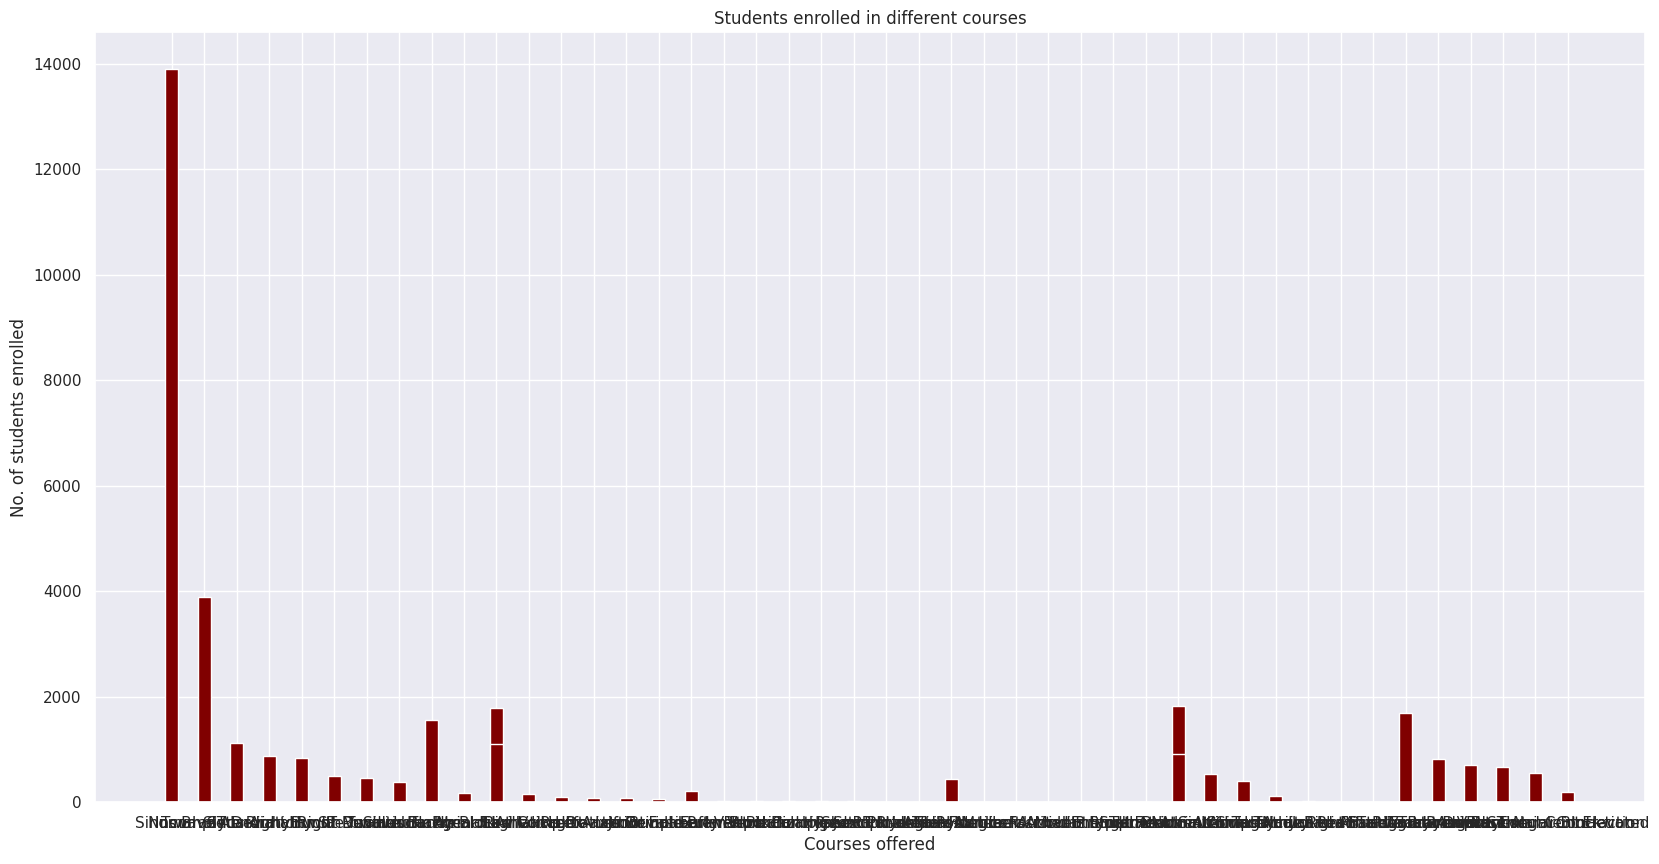

In [83]:
# import numpy as np
# import matplotlib.pyplot as plt 

# # creating the dataset
# values = list(df['Label'])
# courses = list(df['Name'])
 
# fig = plt.figure(figsize = (20, 10))

# # creating the bar plot
# plt.bar(courses, values, color ='maroon', 
#         width = 0.4)

# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()

In [23]:
# df.to_csv('/media/mountHDD2/thao/git/HeartResearch/SPH Dataset/data_all.csv')

In [15]:
# os.getcwd()

'/media/mountHDD2/thao/git/HeartResearch/SPH Dataset/Data_Explore'